In [24]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("http://data.ntpc.gov.tw/od/data/api/54DDDC93-589C-4858-9C95-18B2046CC1FC?$format=csv")

## 資料為新北市政府資料開放平台："新北市公共自行車租賃系統(YouBike)"

### 若當地的youbike停車格數越多，是否代表當地youbike可借車位數越多呢？ 藉由線性迴歸分析，透過 場站總停車格 來預測 可借車位數

In [9]:
df.head()
#tot 為 場站總停車格
#sbi 為 可借車位數

,sno,sna,tot,sbi,sarea,mday,lat,lng,ar,sareaen,snaen,aren,bemp,act
0,1001,大鵬華城,38,10,新店區,20190412070843,24.991160,121.533980,新北市新店區中正路700巷3號,Xindian Dist.,Dapeng Community,"No. 3, Lane 700 Chung Cheng Road, Xindian Dist...",28,1
1,1002,汐止火車站,56,18,汐止區,20190412070819,25.068914,121.662748,南昌街/新昌路口(西側廣場),Xizhi Dist.,Xizhi Railway Station,Nanchang St./Xinchang Rd.,36,1
2,1003,汐止區公所,46,18,汐止區,20190412070818,25.064162,121.658301,新台五路一段/仁愛路口(新台五路側汐止地政事務所前機車停車場),Xizhi Dist.,Xizhi Dist. Office,"Sec. 1, Xintai 5th Rd./Ren’ai Rd.",28,1
3,1004,國泰綜合醫院,56,13,汐止區,20190412070832,25.073150,121.662555,建成路78號對面停車場,Xizhi Dist.,Cathay General Hospital,"No78, Jiancheng Rd",43,1
4,1005,裕隆公園,40,16,新店區,20190412070832,24.979649,121.546319,寶中路/品牌路口(東南側),Xindian Dist.,Yulon Park,Baozhong Rd./,24,1


### 先對 tot 做排序

In [19]:

df.sort_values(by=['tot'])

,sno,sna,tot,sbi,sarea,mday,lat,lng,ar,sareaen,snaen,aren,bemp,act
456,1463,新泰游泳池,26,12,新莊區,20190412070853,25.045414,121.442734,新泰路478號(對面)(鄰近新莊文化藝術中心),Xinzhuang Dist.,Xintai Swimming Pool,"No.478, Xintai Rd., Xinzhuang Dist.",13,1
509,1516,成泰路一段(中油),26,12,五股區,20190412070820,25.078430,121.435650,成泰路一段194號(對面),Wugu Dist.,"Sec. 1, Chengtai Rd. (CPC)","No.194, Sec. 1, Chengtai Rd., Wugu Dist.",14,1
208,1209,崇德橋東活動中心,26,0,汐止區,20190412070833,25.070512,121.667002,茄苳路84號(崇德橋東里民活動中心前),Xizhi Dist.,Chungde-Ciaodong Activity Center,"No.84, Jiadong Rd.",26,1
405,1412,捷運大坪林站(1號出口),28,1,新店區,20190412070818,24.982755,121.541249,北新路三段129號(右側人行道),Xindian Dist.,MRT DaPingLin Station(Exit. 1),"No.129, Sec. 3, Beixin Rd., Xindian Dist.",27,1
507,1514,延吉街47巷口,28,7,土城區,20190412070833,24.987690,121.472220,延吉街43號(對面),Tucheng Dist.,"Ln. 47, Yanji St.","No.43, Yanji St., Tucheng Dist.(opposite)",21,1
334,1335,三重五常公園,28,25,三重區,20190412070835,25.080648,121.496149,三重區五華街7巷(對面公園人行道),Sanchong Dist.,Wuchang Park(Sanchong Dist),"Ln. 7, Wuhua St., Sanchong Dist",3,1
522,1614,中正路284巷,28,4,新店區,20190412070843,24.974700,121.538420,中正路284巷2號(對面),Xindian Dist.,"Ln. 284, Zhongzheng Rd.","No.2, Ln. 284, Zhongzheng Rd., Xindian Dist.(o...",24,1
204,1205,竹圍公園,28,8,淡水區,20190412070841,25.138234,121.463395,淡水區民生路108號旁公園通道(竹圍公園),Tamsui Dist.,Chuwei Park,"No.108, Minsheng Rd.",20,1
493,1500,忠孝活動中心,28,9,永和區,20190412070819,25.016770,121.515280,忠孝街26巷8號(前)(鄰近楊三郎美術館),Yonghe Dist.,Zhongxiao Activity Center,"No.8, Ln. 26, Zhongxiao St., Yonghe Dist.",15,1
183,1184,中和地政事務所,28,21,中和區,20190412070842,24.990393,121.502397,復興路280號,Zhonghe Dist.,Zhonghe Land Office,"No.280, Fuxing Rd.",7,1


### 繪製散佈圖，觀察原始資料中 tot 與 sbi 的關係

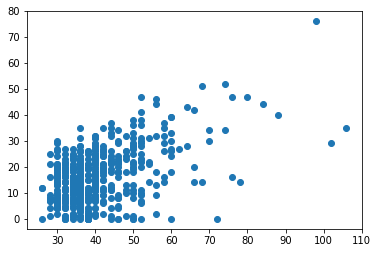

In [20]:
plt.scatter(df["tot"], df["sbi"])

#### 從圖中看來雖然前段資料很密集，但綜觀來看似乎有正相關

### 開始進行預測，將資料分為 70% training data 與 30% testing data

In [26]:
regr = LinearRegression()

In [35]:
#進行回歸前資料前處理
x = np.array(df["tot"])
y = np.array(df["sbi"])
X = x.reshape(len(x), 1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 40)

### 觀察 training data 與  testing data 的散佈情況

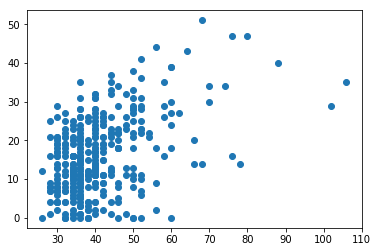

In [37]:
plt.scatter(x_train, y_train)

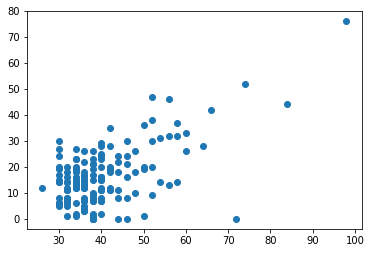

In [39]:
plt.scatter(x_test, y_test)

#### 從圖看來 training 與 testing 的趨勢均未偏離原始資料

### 建立迴歸模型

In [41]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 生成預測值 

In [43]:
Y_pred = regr.predict(x_test)

## 作圖評估預測效果

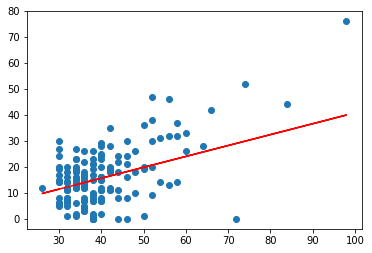

In [45]:
plt.scatter(x_test, y_test)
plt.plot(x_test, Y_pred, 'r')

### 結論：散佈圖為testing data，紅色為預測迴歸線， 可以看到除了右上角的離群值以外，迴歸線與testing data的配適度還不錯。然而，雖然迴歸線的斜率與testing data正向趨勢相近，但隨著 tot(場站總停車格) 增加，預測值(線上的點)與實際值(testing data) 的距離越遠，代表 sbi (可借車位數)預測準確度可能隨著 tot (場站總停車格) 增加 而減少。但總結來說，確實可以利用總停車格數來約略估計當地的 youbike 可借車位數。